# Haberman's survival-data-set EDA

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes



In [2]:
# let us prepare the data and get some initial insights on the dataset.

In [3]:
df = pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


* The age feature is the age of the patient.
* the year feature describes year in which the patient was undergone a surgery.
* the nodes are basically the number of positive axillary nodes detected.
* If patients survived 5 years or more is represented as 1 
  in status and patients who survived less than 5 years is represented as 2 under status.

* There are four attributes in this dataset out of which 3 of them are taken as features and 1 as a class attrinute.

* we have taken age, year, nodes as features and "status" as aour class label.

In [4]:
# how many data points do we have?
df.shape

(306, 4)

In [5]:
# getting the column names in the dataset

df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
# what all type of status do we have?
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [7]:
# we can conclude that the dataset is not balanced.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
print("Number of rows: " + str(df.shape[0]))
print("Number of columns: " + str(df.shape[1]))
print("Columns: " + ", ".join(df.columns))

print("Target variable distribution")
print(df.iloc[:,-1].value_counts())
print("*"*50)
print(df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns: age, year, nodes, status
Target variable distribution
1    225
2     81
Name: status, dtype: int64
**************************************************
1    0.735294
2    0.264706
Name: status, dtype: float64


Observations:
* The age of the patients vary from 30 to 83 with the median of 52.
* Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes
* The dataset contains only a small number of records (306). and have no missing values
* The target column is imbalanced with 73% of values are 'yes'

#### 2-D Scatter Plot

Text(0.5, 1.0, '2D scatter plot without color coding b/w nodes and age')

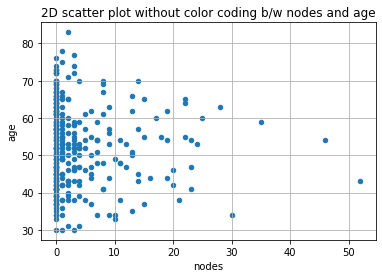

In [10]:
df.plot(kind = 'scatter', x = 'nodes', y = 'age')
plt.grid()
plt.title("2D scatter plot without color coding b/w nodes and age")

In [11]:
# to distinguish between the data
# we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every 
#classification feature.

#### 2-D Scatter plot with color-coding for each status class.

Text(0.5, 0.98, '2D scatter Plot')

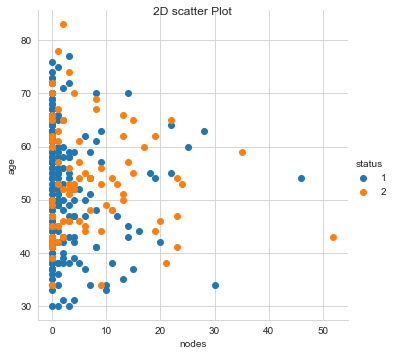

In [12]:
# here we are using seaborn library
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='status', height = 5).map(plt.scatter, 'nodes', 'age').add_legend()
g.fig.suptitle('2D scatter Plot')

In [13]:
# here the blue dots (status 1) represents 
# the survival rate more than 5 years 
# and orange dots(status 2) represents survival rate less than 5 years.

In [14]:
# but we cannot easily distinguish/ classify between the statuses with this plot.

#### Pairplots

let us draw pairplots to get a much more clear understanding of how are features are able to classify among the statuses.

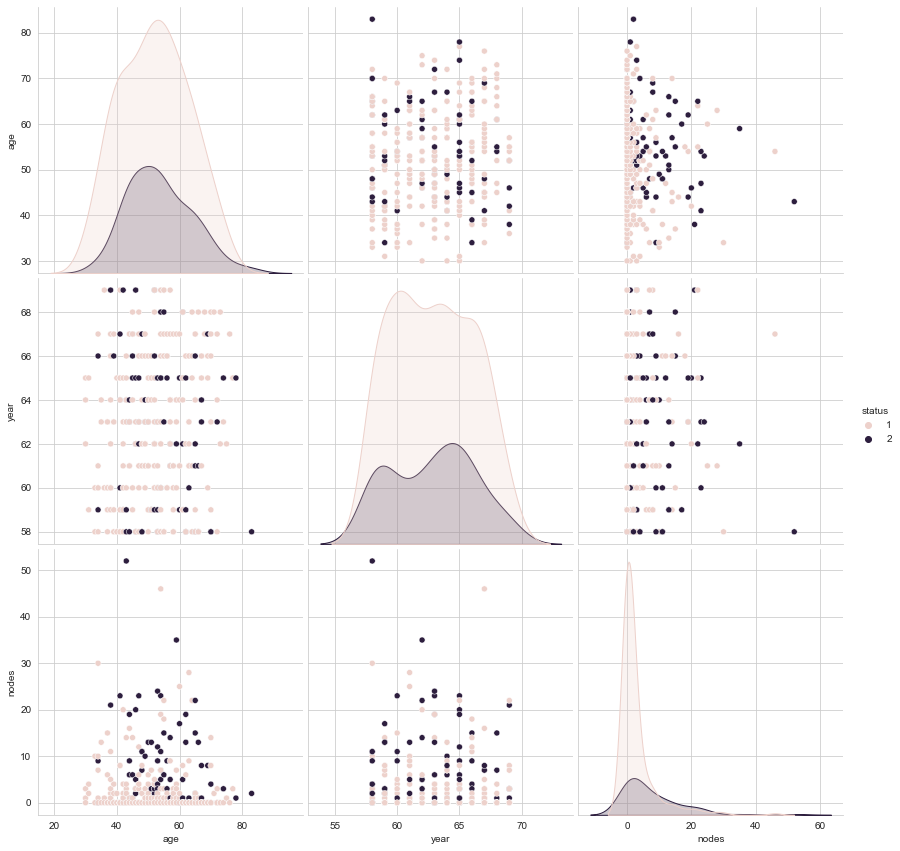

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df, hue="status", height = 4)

In [16]:
# Conclusion
# The datapoints in all of the obove plots are somewhat overlapping, so we cannot easily distinguish between the label class
# The plot 3 and plot plot 7 (plots between age and nodes) are a better bet as the overlapping in them is slightly less.

In [17]:
# Let's plot a 1D scatter plot

### 1D scatter plot

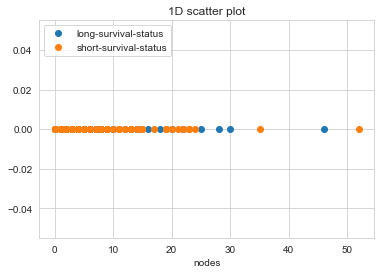

In [18]:
import numpy as np
status_long_survival = df.loc[df["status"] == 1]
status_short_survival = df.loc[df["status"] == 2]
plt.plot(status_long_survival["nodes"], np.zeros_like(status_long_survival["nodes"]), 'o', label="long-survival-status")

plt.plot(status_short_survival["nodes"], np.zeros_like(status_short_survival["nodes"]), 'o',label="short-survival-status")
plt.xlabel("nodes")
plt.title('1D scatter plot')
plt.legend(loc="upper left")

plt.show()

 1D scatter plot using data feature Age and Axillary nodes

### 2D scatter plot

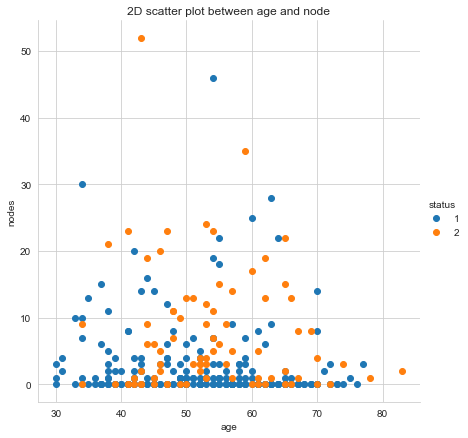

In [19]:
# AGE VS AUXILLARY NODES
sns.FacetGrid(df, hue="status", height=6).map(plt.scatter, "age", "nodes").add_legend()
plt.title('2D scatter plot between age and node')
plt.show();

Observations :

* Patients with Age < 40 and Auxillary nodes < 30 have higher chances of survival.
* Patients with Age > 50 and Auxillary nodes > 10 has less chances of survival.

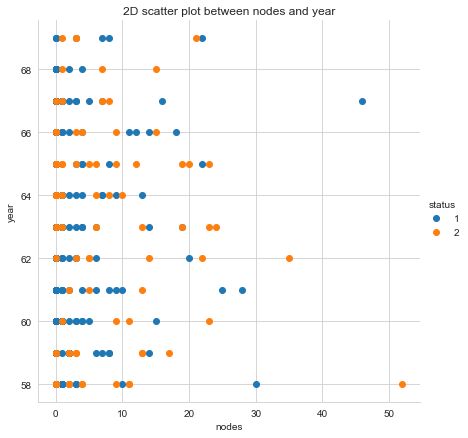

In [20]:
#AUXILLARY NODES VS OPERATION YEAR
sns.FacetGrid(df, hue="status", height=6).map(plt.scatter, "nodes", "year").add_legend()
plt.title('2D scatter plot between nodes and year')
plt.show()

In [21]:
# no conclusions can be drawn from above plot

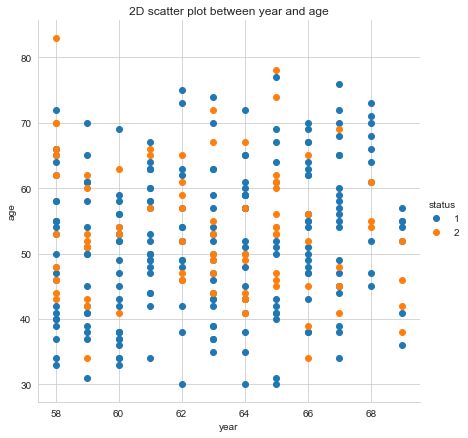

In [22]:
#AGE VS OPERATION YEAR
sns.FacetGrid(df, hue="status", height=6).map(plt.scatter, "year", "age").add_legend()
plt.title('2D scatter plot between year and age')
plt.show()

Observation :

* One interesting observation can be drawn as for the operation year 60, 61 and 68 the survival rate is significantly more.

### Distplot for generating PDFs 

c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


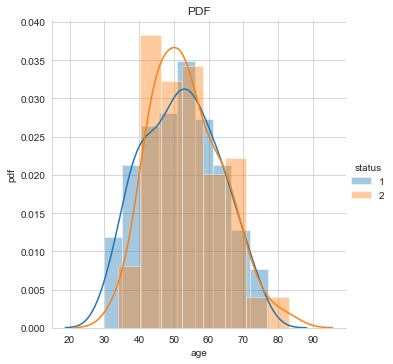

c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


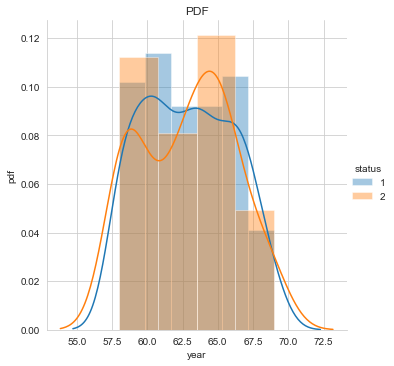

c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\yerpu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


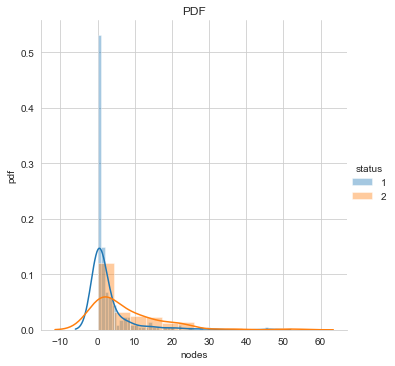

In [23]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='status', height=5)
    fg.map(sns.distplot, feature, label = feature).add_legend()
    plt.xlabel(feature)
    plt.ylabel("pdf")
    plt.title('PDF')
    plt.show()

Conclusions from the above PDFs and histogram

* In the first and second plot (pdfs of age and year) we cannot clearly classify and seperate the datapoints.
* In the third plot of PDF of nodes, we can observe that more number of people survive if they have less axillary nodes.


With the help of a simple if else statement, we can come to a conclusion that is->

if (nodes <= 0) -> patient = long_survival <br>
elif (nodes in between 0 and 3.5) -> patient = long_survival<br>
elif (nodes>= 3.5) -> patient = short_survival

In [24]:
# let's plot cdf for the selected plot

### CDF

Text(0, 0.5, 'PDF / CDF')

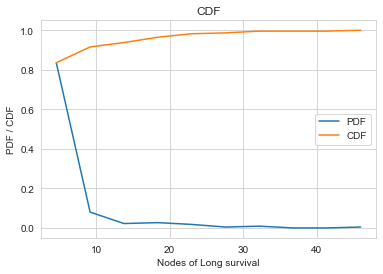

In [25]:
counts, bin_edges = np.histogram(status_long_survival["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
# print("pdf = ",pdf)
# print("bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label ="CDF")
plt.legend()
plt.title("CDF")
plt.xlabel('Nodes of Long survival')
plt.ylabel('PDF / CDF')


In [26]:
# the above plot is the cdf for status_long_survival (status = 1)

From above CDF we can observe that orange line shows there is around 85% chance of long survival if number of axillary nodes detected are < 5. Also we can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

pdf =  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges = [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0, 0.5, 'PDF / CDF')

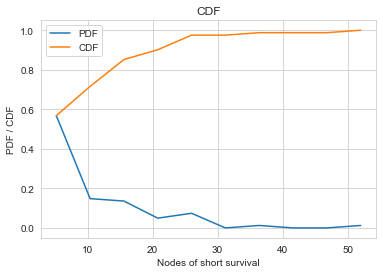

In [27]:
counts, bin_edges = np.histogram(status_short_survival["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print("pdf = ",pdf)
print("bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label ="CDF")
plt.legend()
plt.title("CDF")
plt.xlabel('Nodes of short survival')
plt.ylabel('PDF / CDF')

In [28]:
# the above plot is the cdf for status_short_survival (status = 2)

From the above two plots we can conclude that:
nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

In [29]:
# let us predict the status and get the insights on data through statistical analyses

### Mean, Variance and Std-dev

In [30]:
print("Mean")
print (np.mean(status_long_survival["nodes"]))
print (np.mean(status_short_survival["nodes"]))
print("\nStandard-deviation")
print(np.std(status_long_survival["nodes"]))
print(np.std(status_short_survival["nodes"]))

Mean
2.7911111111111113
7.45679012345679

Standard-deviation
5.857258449412138
9.128776076761635


we can draw the conclusions like
* long survival (status 1) have mean value of nodes as 2.79 whereas the short survival of (status 2) have mean value of nodes as 7.45 which is quite high.

* also the standard deviation (spread of data-points) is huge with respect to the short survival category.


### Median, Quantiles and Percentile

In [31]:
print("medians")
print("status 1 :",np.median(status_long_survival["nodes"]))
print("status 2 :",np.median(status_short_survival["nodes"]))
print("\n Quantiles")
print("status 1 :",np.percentile(status_long_survival["nodes"],np.arange(0,100,25)))
print("status 2 :",np.percentile(status_short_survival["nodes"],np.arange(0,100,25)))

print("\n 90th percentile")
print("status 1 :",np.percentile(status_long_survival["nodes"],90))
print("status 2 :",np.percentile(status_short_survival["nodes"],90))

medians
status 1 : 0.0
status 2 : 4.0

 Quantiles
status 1 : [0. 0. 0. 3.]
status 2 : [ 0.  1.  4. 11.]

 90th percentile
status 1 : 8.0
status 2 : 20.0


Conclusions
* nearly 50th% of axillary nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.
* Similarly, In short survival 75th% of patients have minimum 11 nodes detected.
* At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

In [32]:
# let us plot box plot and whiskers plot for the above data

### Box Plot

In [33]:
# let's take all the features and plot a box plot

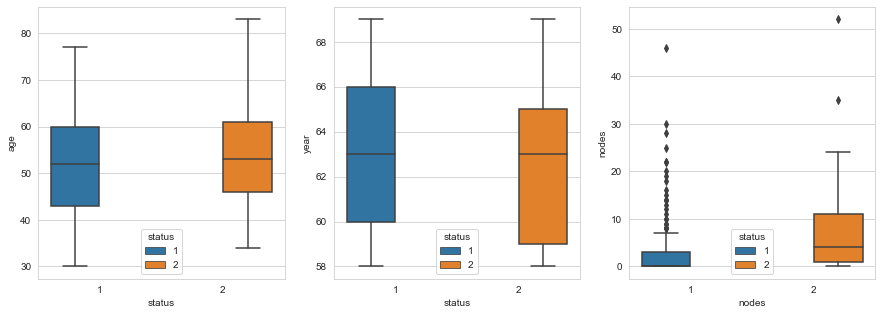

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    g = sns.boxplot( x='status', y=feature, data=df, hue='status', ax=axes[idx])    
    plt.xlabel(feature)

plt.show()

### Violoin plot

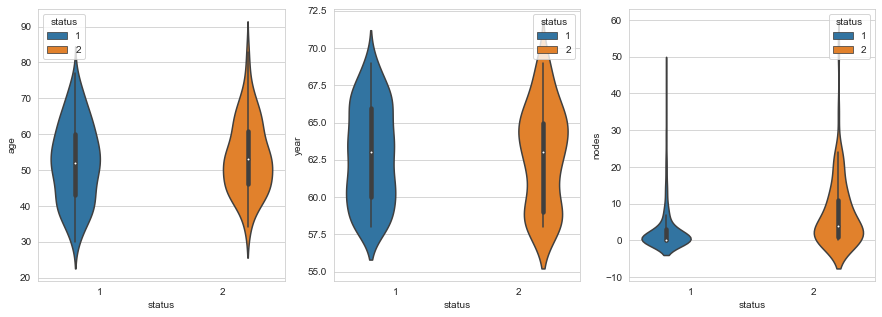

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=df, hue='status', loc='lower center', ax=axes[idx])
plt.show()

Conclusions:
* When we look at the box plot between nodes and age, nodes between 0–7 have chances of error as short survival plot also lies in it. That is 50% error for Short survival status.
* The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

### Contour Plot

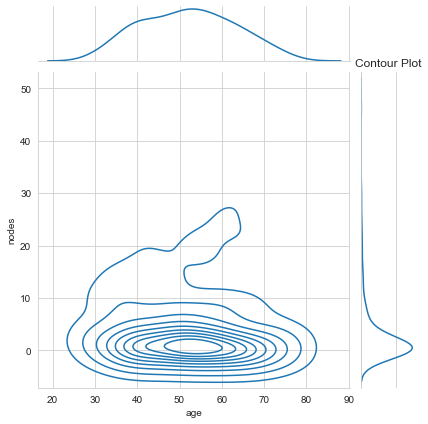

In [36]:
sns.jointplot(x="age",y="nodes",data=status_long_survival,kind="kde")
plt.grid()
plt.title("Contour Plot")
plt.show()


Obseravations:
* For nodes less than 5 and age range between 47-60 the chances of survival are more

In [37]:
# this concludes EDA

## Conclusion

The Exploratory data analysis for Haberman's dataset is concluded and with the help pf various python libraries and statistical medthods we can classify the different status patients.